In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("darkgrid")
# plotting style (any color scheme is fine, I used dark mode)

pd.options.mode.chained_assignment = None

In [2]:
# URL page we will be scraping
url = "https://www.basketball-reference.com/teams/CHI"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

# creating the dataframe which will have all the required data
df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(56)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
df = df[:-1]
df.reset_index(drop=True, inplace=True)

df = df[['seasons', 'W/L%', 'SRS', 'Rel ORtg', 'Rel DRtg', 'Top WS']]
df[:5]

,seasons,W/L%,SRS,Rel ORtg,Rel DRtg,Top WS
0,1966,.407,-3.37,-3.8,-0.7,B. Boozer (9.4)
1,1967,.354,-3.76,-2.7,0.7,B. Boozer (10.6)
2,1968,.402,-2.11,-3.5,-1.5,B. Boozer (11.6)
3,1969,.476,-1.71,-1.4,0.1,C. Walker (9.8)
4,1970,.622,5.47,3.3,-1.5,C. Walker (10.9)


## Splitting data into two subsets: 
## i) Seasons MJ played for Bulls
## ii) Seasons MJ didn't play for Bulls

In [3]:
# converting data into numeric form as it's text by default

numeric_cols = ['W/L%', 'SRS', 'Rel ORtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [4]:
# indices of the seasons mj played for bulls
A = np.array([18, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31])

# indices of the seasons mj didn't play for bulls
B = np.arange(55)
B = np.array([i for i in B if i not in A])

dfa = df.iloc[A, :]
dfb = df.iloc[B, :]

# Analysis of team stats

## 1. MJ's impact on Win Percentage

In [5]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W/L%'

mean_stat_with_jordan = np.mean(dfa[stat_name])
mean_stat_without_jordan = np.mean(dfb[stat_name])
print(mean_stat_with_jordan, mean_stat_without_jordan)
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

0.68509096 0.4631136
Ttest_indResult(statistic=4.511601281502428, pvalue=3.6058659839612744e-05)


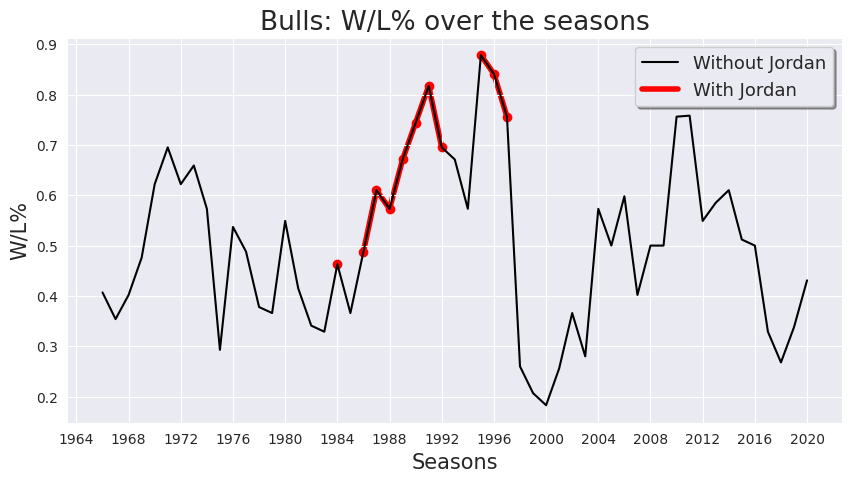

In [6]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='black')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.savefig('plots/mj1.png')
plt.show()

## 2. MJ's impact on Simple Rating System

In [7]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'SRS'

mean_stat_with_jordan = np.mean(dfa[stat_name])
mean_stat_without_jordan = np.mean(dfb[stat_name])
print(mean_stat_with_jordan, mean_stat_without_jordan)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))


5.814545 -1.183409
Ttest_indResult(statistic=4.667825268794722, pvalue=2.112192251664896e-05)


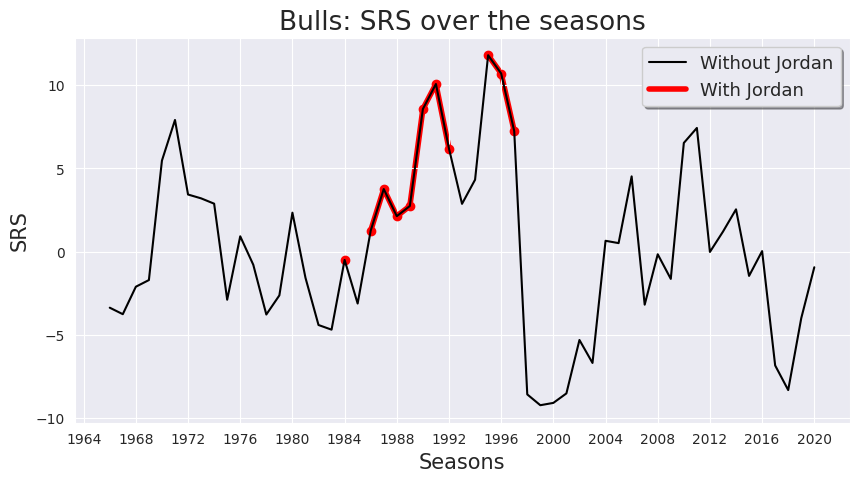

In [8]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='black')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.savefig('plots/mj2.png')
plt.show()

## 3. MJ's impact on Relative Offensive Rating

In [9]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel ORtg'

mean_stat_with_jordan = np.mean(dfa[stat_name])
mean_stat_without_jordan = np.mean(dfb[stat_name])
print(mean_stat_with_jordan, mean_stat_without_jordan)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))


4.0454545 -2.0204546
Ttest_indResult(statistic=5.733442303214168, pvalue=4.792053686003593e-07)


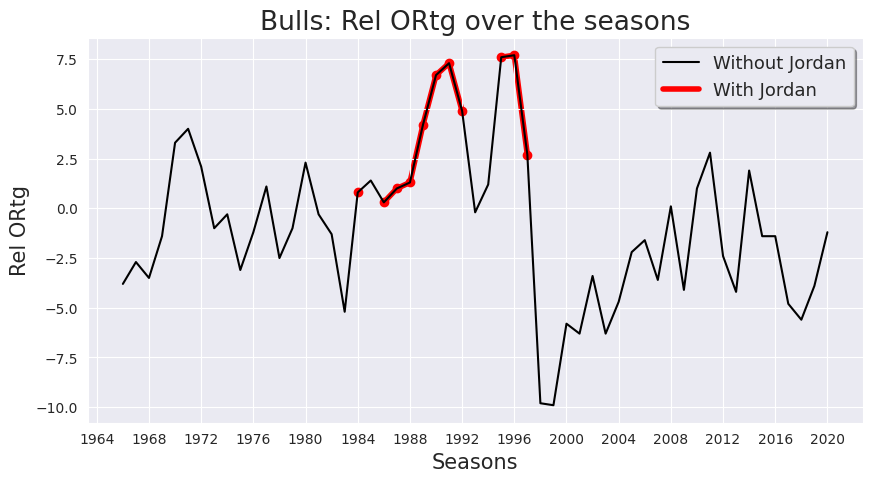

In [10]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='black')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.savefig('plots/mj3.png')
plt.show()

## 4. MJ's impact on Relative Defensive Rating

In [11]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel DRtg'

mean_stat_with_jordan = np.mean(dfa[stat_name])
mean_stat_without_jordan = np.mean(dfb[stat_name])
print(mean_stat_with_jordan, mean_stat_without_jordan)

print(ttest_ind(dfa[stat_name], dfb[stat_name]))


-2.209091 -0.85
Ttest_indResult(statistic=-1.398667275253689, pvalue=0.16773743136437205)


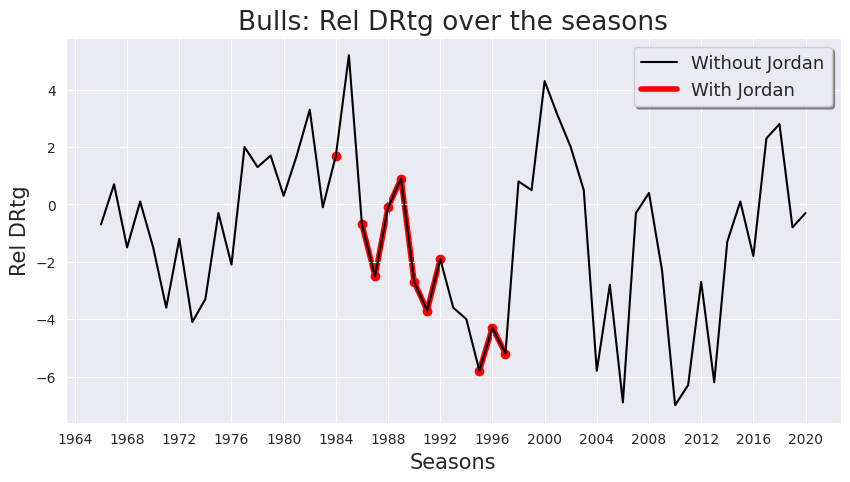

In [12]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='black')
plt.scatter(df['seasons'][18], df[stat_name][18], color='#ff0000')
plt.scatter(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000')
plt.plot(df['seasons'][20:27], df[stat_name][20:27], color='#ff0000', lw=4, zorder=-1)
plt.scatter(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000')
plt.plot(df['seasons'][29:32], df[stat_name][29:32], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Jordan', 'With Jordan'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Bulls: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.4)

plt.savefig('plots/mj4.png')
plt.show()

 # Win Share bar plots

In [13]:
# cleaning the data of win share leaders (Top WS column in our dataframe)
player_names = []
player_ws = []
for c in df['Top WS']:
#     print(c.split()[2].strip('()'), c.split()[:2])
    d = c.split()[0] + c.split()[1] 
    player_ws += [c.split()[2].strip('()')]
    player_names += [d]
player_ws = np.array(player_ws, dtype=float)
print(player_names, player_ws)
player_names = np.array(player_names)
df['WS'] = player_ws
df['WS player'] = player_names

['B.Boozer', 'B.Boozer', 'B.Boozer', 'C.Walker', 'C.Walker', 'C.Walker', 'C.Walker', 'C.Walker', 'C.Walker', 'M.Johnson', 'A.Gilmore', 'A.Gilmore', 'A.Gilmore', 'R.Theus', 'A.Gilmore', 'A.Gilmore', 'R.Theus', 'D.Greenwood', 'M.Jordan', 'O.Woolridge', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'S.Pippen', 'S.Pippen', 'M.Jordan', 'M.Jordan', 'M.Jordan', 'D.Simpkins', 'E.Brand', 'E.Brand', 'B.Miller', 'D.Marshall', 'K.Hinrich', 'T.Chandler', 'K.Hinrich', 'L.Deng', 'B.Gordon', 'B.Gordon', 'J.Noah', 'D.Rose', 'J.Noah', 'J.Noah', 'J.Noah', 'J.Butler', 'J.Butler', 'J.Butler', 'B.Portis', 'R.Arcidiacono', 'Z.LaVine', 'Z.LaVine'] [ 9.4 10.6 11.6  9.8 10.9 14.5 10.9 10.6 10.5  8.3 12.2 11.5 12.7  6.9
 12.3 12.1  6.5  5.7 14.   5.6 16.9 21.2 19.8 19.  20.3 17.7 17.2 11.2
 11.8 20.4 18.3 15.8  2.9  7.5  6.1  4.4  6.   4.1  8.3  7.6 11.3  5.1
  6.9  6.2 13.1  9.   7.3 11.2 11.2  9.1 13.8  3.5  3.7  4.   5.9]


### Win share frequency plot to display the number of times a player was the team leader in win shares

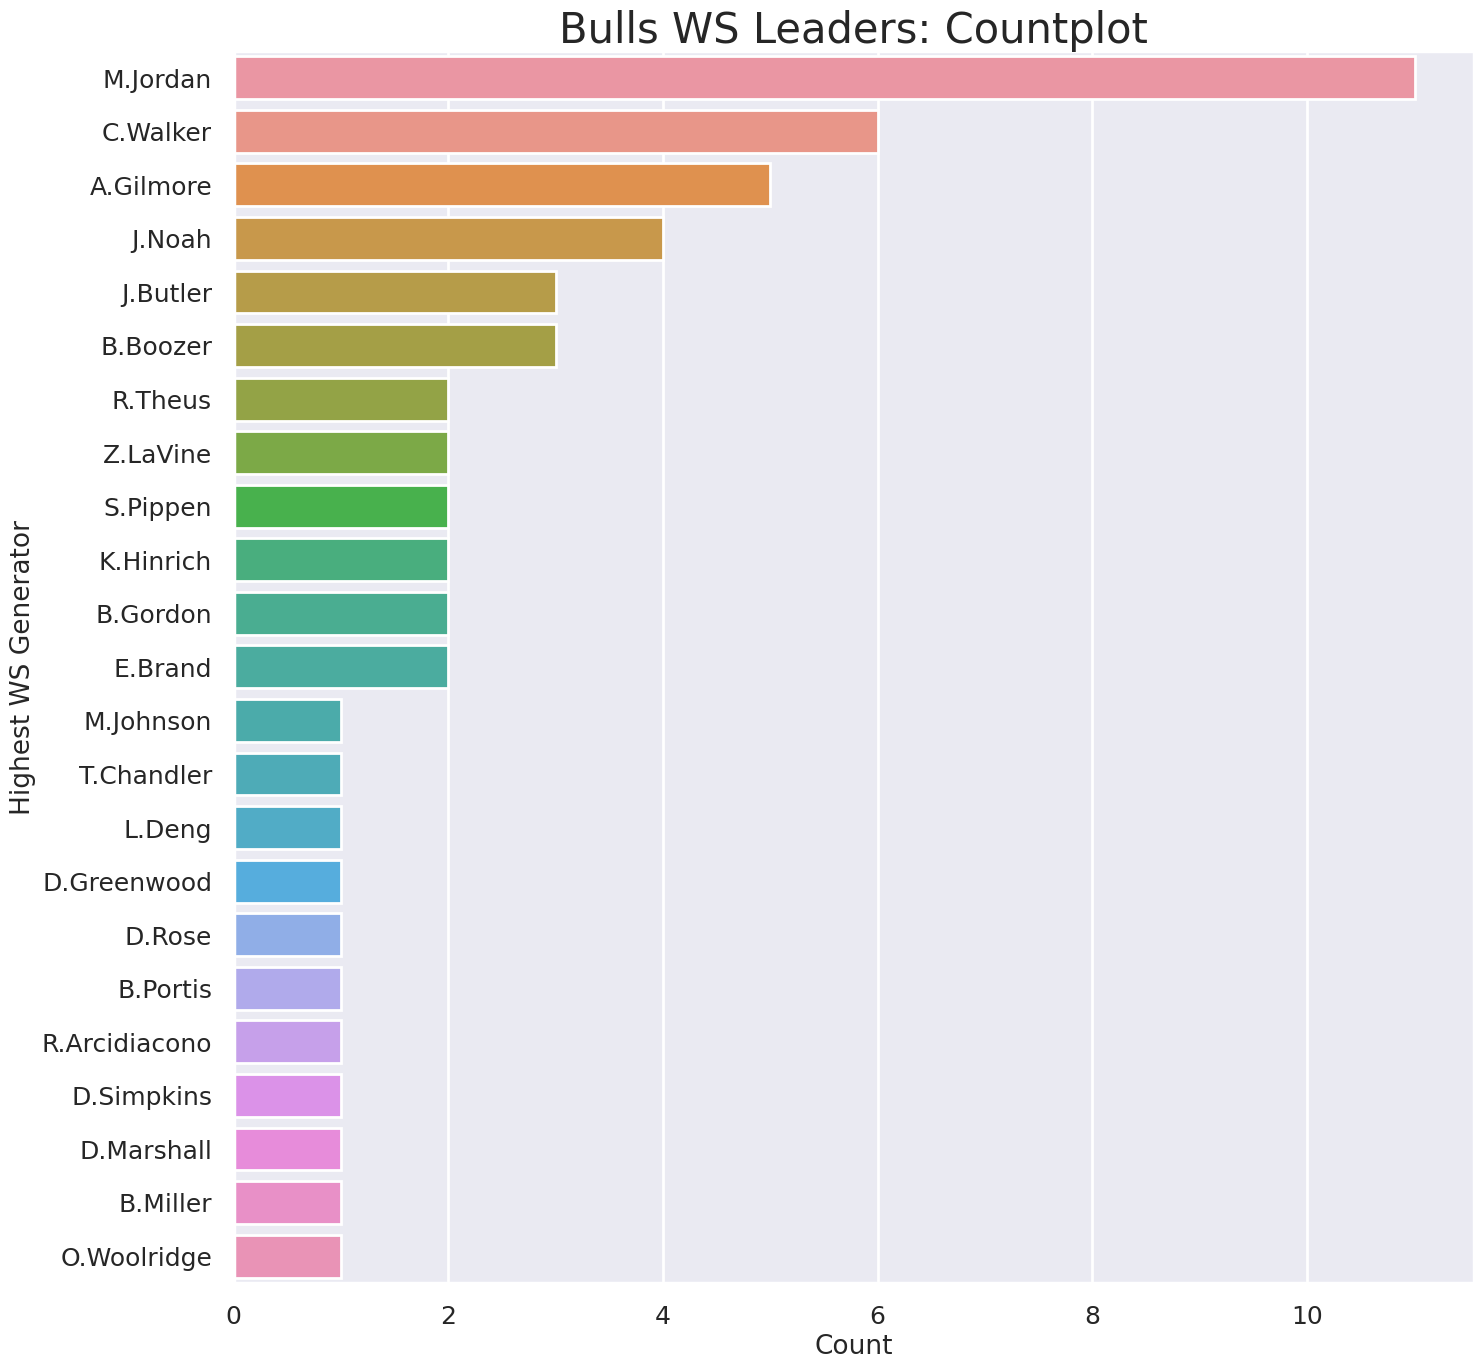

23


In [41]:
sns.set_style("darkgrid")  # grid
plt.tight_layout()
plt.rcParams['figure.figsize'] = (16, 16)
sns.set_context("poster")
plt.title("Bulls WS Leaders: Countplot", size=30)
sns.countplot(y="WS player", data=df, order = df['WS player'].value_counts().index)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Highest WS Generator", size=19)
plt.xlabel("Count", size=19)
plt.savefig('plots/mjws1.png')
plt.show()
# print(df['WS name'])
print(len(np.unique(player_names)))

### Win Share Leaders Box Plot

<Figure size 1000x600 with 0 Axes>

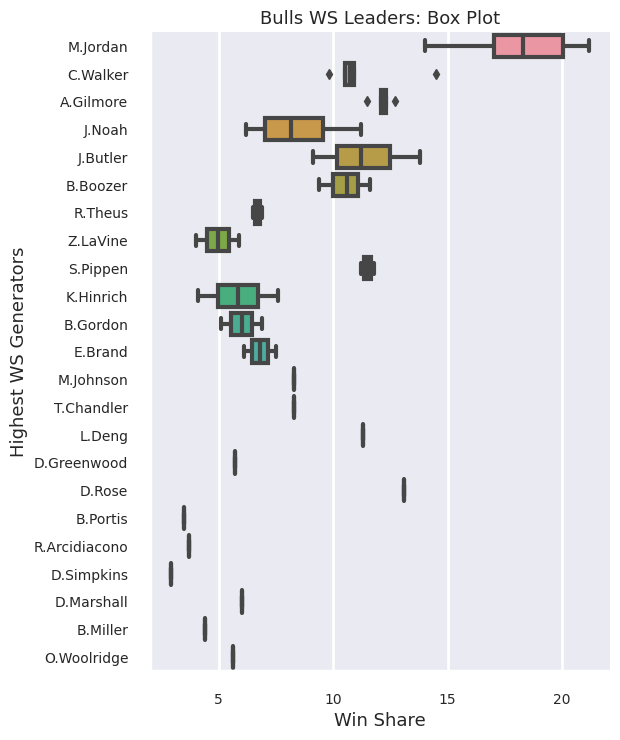

In [18]:
plt.tight_layout()
sns.set_context("poster")
sns.catplot(y="WS player", x="WS", kind="box", data=df, height=8, aspect=1, order = df['WS player'].value_counts().index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Bulls WS Leaders: Box Plot", size=13)
plt.ylabel("Highest WS Generators", size=13)
plt.xlabel("Win Share", size=13)
plt.savefig('plots/mjws2.png')
plt.show()